In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

In [9]:
df = pd.read_csv("day.csv")

df, df_validate = np.split(df.sample(frac=1, random_state=0), [int(.8*len(df))])

d:\__STUDIUM\Proseminar-Bagging-Boosting-Ensemble-Learning\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Train / Test Split

In [10]:
def create_features(df):
    df = df.copy()

    features = [
        "season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"
    ]

    X = df[features]
    y = df["cnt"]

    return X, y

### Create Model

In [11]:
def get_model(n_estimators=1000):
    model = GradientBoostingRegressor(
        learning_rate=0.1,
        n_estimators=n_estimators,
        max_depth=5,
        random_state=0,
        verbose=0
    )
    
    return model

In [12]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
scores = []

for train_index, test_index in kf.split(df):
    train = df.iloc[train_index]
    test = df.iloc[test_index]

    X_train, y_train = create_features(df=train)
    X_test, y_test = create_features(df=test)

    model = get_model()

    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    scores.append(score)

print(np.average(scores))
print(scores)

0.8711720584188711
[0.869073961932924, 0.8251117366227982, 0.8702277497386108, 0.9133785704830444, 0.897829571708531, 0.944278556532357, 0.8798164418097221, 0.7568344879850047, 0.8871050913480018, 0.8680644160277162]


### Validation

In [13]:
X, y = create_features(df=df)
X_val, y_val = create_features(df=df_validate)

model = get_model()

model.fit(X, y)

model.score(X_val, y_val)

0.8824391140080714

### Plot

In [14]:
from sklearn.metrics import r2_score

X, y = create_features(df=df)
X_test, y_test = create_features(df=df_validate)

train_scores = []
test_scores = []
mapping = []

for estimators in range(1, 501):
    model = get_model(n_estimators=estimators)

    model.fit(X, y)

    train_predictions = model.predict(X)
    test_predictions = model.predict(X_test)

    train_score = r2_score(y, train_predictions)
    test_score = r2_score(y_test, test_predictions)

    mapping.append(estimators)
    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"Estimators count: {estimators} | Test score: {train_score:.3f} | Validation score: {test_score:.3f}")


Estimators count: 1 | Test score: 0.169 | Validation score: 0.169
Estimators count: 2 | Test score: 0.307 | Validation score: 0.309
Estimators count: 3 | Test score: 0.419 | Validation score: 0.418
Estimators count: 4 | Test score: 0.511 | Validation score: 0.507
Estimators count: 5 | Test score: 0.587 | Validation score: 0.581
Estimators count: 6 | Test score: 0.649 | Validation score: 0.640
Estimators count: 7 | Test score: 0.700 | Validation score: 0.687
Estimators count: 8 | Test score: 0.743 | Validation score: 0.723
Estimators count: 9 | Test score: 0.779 | Validation score: 0.754
Estimators count: 10 | Test score: 0.808 | Validation score: 0.779
Estimators count: 11 | Test score: 0.833 | Validation score: 0.800
Estimators count: 12 | Test score: 0.853 | Validation score: 0.818
Estimators count: 13 | Test score: 0.870 | Validation score: 0.829
Estimators count: 14 | Test score: 0.884 | Validation score: 0.839
Estimators count: 15 | Test score: 0.896 | Validation score: 0.847
Esti

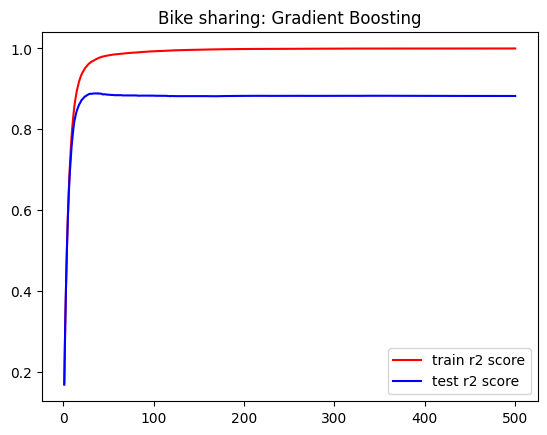

In [15]:
plt.title("Bike sharing: Gradient Boosting")
plt.plot(mapping, train_scores, color='red', label='train r2 score')
plt.plot(mapping, test_scores, color='blue', label='test r2 score')

plt.legend()

plt.savefig("figs/bs_gradient-boosting.png")
plt.show()

In [16]:
print("Max testing score:", max(test_scores))
print("Best estimator count:", test_scores.index(max(test_scores)) + 1)

Max testing score: 0.889130924966945
Best estimator count: 38
